# **Integrated Retail Analytics for Store Optimization**  



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual(Anustup Hazra)


# **Project Summary -**

This project focuses on leveraging advanced machine learning techniques to optimize retail store performance using integrated data analytics. By analyzing historical data on sales, store features, and promotions, the goal is to predict future sales accurately and generate actionable insights that help improve decision-making, inventory management, promotional strategies, and overall store efficiency.



# **GitHub Link -**

https://github.com/anustup123/Integrated-Retail-Analytics-for-Store-Optimization

# **Problem Statement**


Retail chains often struggle to maximize profits and improve operational efficiency across multiple stores due to varying store characteristics, regional demands, and marketing efforts. The key challenge is to develop a data-driven solution that can analyze historical retail data, understand trends and seasonality, and provide accurate forecasts for sales performance across different stores and departments

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/Labmentix projects/Integrated Retail Analytics/sales data-set.csv')
features = pd.read_csv('/content/drive/MyDrive/Labmentix projects/Integrated Retail Analytics/Features data set.csv')
stores = pd.read_csv('/content/drive/MyDrive/Labmentix projects/Integrated Retail Analytics/stores data-set.csv')

### Dataset First View

In [ ]:
# Dataset First Look
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Sales Data Shape: ", sales.shape)
print("Features Data Shape: ", features.shape)
print("Stores Data Shape: ", stores.shape)

Sales Data Shape:  (421570, 5)
Features Data Shape:  (8190, 12)
Stores Data Shape:  (45, 3)


### Dataset Information

In [ ]:
# Dataset Info
sales.info()
features.info()
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Sales Data Duplicate Rows: ", sales.duplicated().sum())
print("Features Data Duplicate Rows: ", features.duplicated().sum())
print("Stores Data Duplicate Rows: ", stores.duplicated().sum())

Sales Data Duplicate Rows:  0
Features Data Duplicate Rows:  0
Stores Data Duplicate Rows:  0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Sales Data Missing Values:\n", sales.isnull().sum())
print("\nFeatures Data Missing Values:\n", features.isnull().sum())
print("\nStores Data Missing Values:\n", stores.isnull().sum())

Sales Data Missing Values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Features Data Missing Values:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Stores Data Missing Values:
 Store    0
Type     0
Size     0
dtype: int64


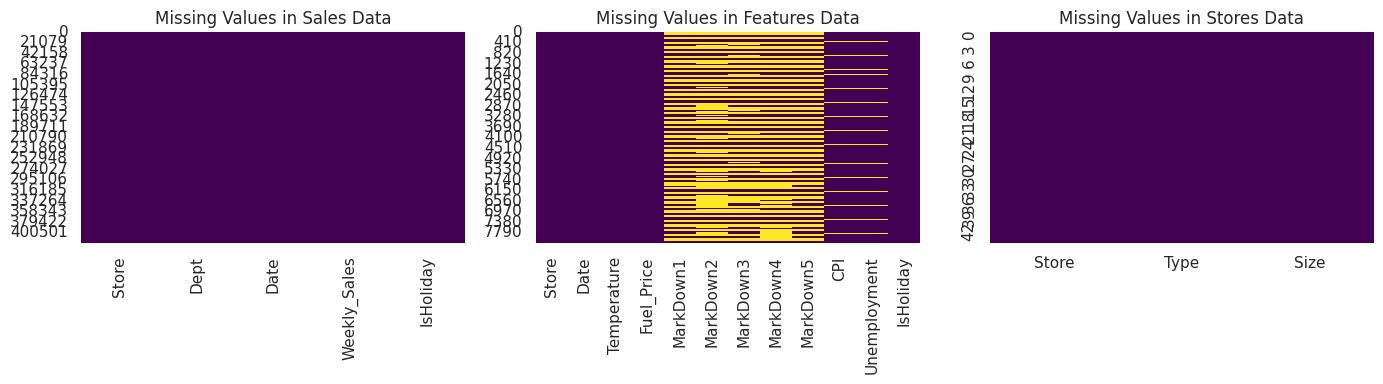

In [ ]:
# Visualizing the missing values

sns.set(style="whitegrid")

# Visualize missing values for each dataset
plt.figure(figsize=(14, 4))

# Sales dataset
plt.subplot(1, 3, 1)
sns.heatmap(sales.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Sales Data')

# Features dataset
plt.subplot(1, 3, 2)
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Features Data')

# Stores dataset
plt.subplot(1, 3, 3)
sns.heatmap(stores.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Stores Data')

plt.tight_layout()
plt.show()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(sales.columns)
print(features.columns)
print(stores.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')


In [ ]:
# Dataset Describe
print("Sales Data Description:\n", sales.describe(include='all'))
print("\nFeatures Data Description:\n", features.describe(include='all'))
print("\nStores Data Description:\n", stores.describe(include='all'))

Sales Data Description:
                 Store           Dept        Date   Weekly_Sales IsHoliday
count   421570.000000  421570.000000      421570  421570.000000    421570
unique            NaN            NaN         143            NaN         2
top               NaN            NaN  23/12/2011            NaN     False
freq              NaN            NaN        3027            NaN    391909
mean        22.200546      44.260317         NaN   15981.258123       NaN
std         12.785297      30.492054         NaN   22711.183519       NaN
min          1.000000       1.000000         NaN   -4988.940000       NaN
25%         11.000000      18.000000         NaN    2079.650000       NaN
50%         22.000000      37.000000         NaN    7612.030000       NaN
75%         33.000000      74.000000         NaN   20205.852500       NaN
max         45.000000      99.000000         NaN  693099.360000       NaN

Features Data Description:
               Store        Date  Temperature   Fuel_Price 

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("Sales Data Unique Values:\n", sales.nunique(),"\n" )
print("Features Data Unique Values:\n", features.nunique(),"\n")
print("Stores Data Unique Values:\n", stores.nunique(),"\n")

Sales Data Unique Values:
 Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64 

Features Data Unique Values:
 Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64 

Stores Data Unique Values:
 Store    45
Type      3
Size     40
dtype: int64 



## ***3. Anomaly detection***

In [ ]:
# Merge all datasets on appropriate keys
data = sales.merge(stores, on='Store')
data = data.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Aggregate total sales per week
sales_ts = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
sales_ts.set_index('Date', inplace=True)

# Define window size for rolling statistics
window_size = 4  # 4 weeks (1 month)

# Rolling statistics
sales_ts['rolling_mean'] = sales_ts['Weekly_Sales'].rolling(window=window_size).mean()
sales_ts['rolling_std'] = sales_ts['Weekly_Sales'].rolling(window=window_size).std()

# Define upper and lower bounds for anomalies
sales_ts['upper_bound'] = sales_ts['rolling_mean'] + 2 * sales_ts['rolling_std']
sales_ts['lower_bound'] = sales_ts['rolling_mean'] - 2 * sales_ts['rolling_std']

# Flag anomalies
sales_ts['is_anomaly'] = (
    (sales_ts['Weekly_Sales'] > sales_ts['upper_bound']) |
    (sales_ts['Weekly_Sales'] < sales_ts['lower_bound'])
)



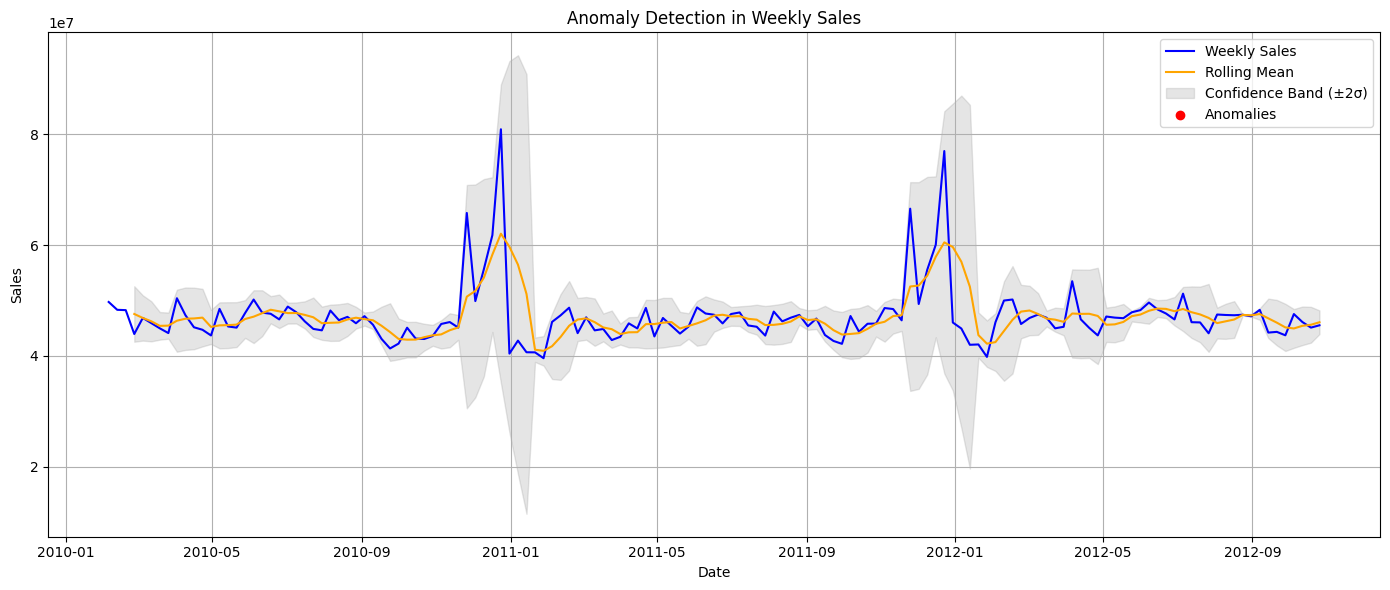

In [ ]:
#Visualize Anomalies
plt.figure(figsize=(14, 6))

# Plot the actual sales
plt.plot(sales_ts.index, sales_ts['Weekly_Sales'], label='Weekly Sales', color='blue')

# Plot rolling mean and bounds
plt.plot(sales_ts.index, sales_ts['rolling_mean'], label='Rolling Mean', color='orange')
plt.fill_between(sales_ts.index, sales_ts['lower_bound'], sales_ts['upper_bound'],
                 color='gray', alpha=0.2, label='Confidence Band (±2σ)')

# Plot anomalies
anomalies = sales_ts[sales_ts['is_anomaly']]
plt.scatter(anomalies.index, anomalies['Weekly_Sales'], color='red', label='Anomalies', zorder=5)

plt.title("Anomaly Detection in Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Detected Anomalies:")
print(anomalies[['Weekly_Sales']])

Detected Anomalies:
Empty DataFrame
Columns: [Weekly_Sales]
Index: []


What is/are the insight(s) found from the setection?

There are no anomalies in the dataset.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Merge all datasets on appropriate keys
data = sales.merge(stores, on='Store')
data = data.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Sort the data
data.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

# Fill missing values
data['Temperature'].fillna(method='ffill', inplace=True)
data['Fuel_Price'].fillna(method='ffill', inplace=True)
data['CPI'].fillna(method='ffill', inplace=True)
data['Unemployment'].fillna(method='ffill', inplace=True)
data['MarkDown1'].fillna(0, inplace=True)
data['MarkDown2'].fillna(0, inplace=True)
data['MarkDown3'].fillna(0, inplace=True)
data['MarkDown4'].fillna(0, inplace=True)
data['MarkDown5'].fillna(0, inplace=True)

# Feature engineering
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week.astype(int)
data['Day'] = data['Date'].dt.day
data['IsWeekend'] = data['Date'].dt.weekday >= 5

# Encode categorical variable 'Type'
data['Store_Type'] = data['Type'].astype('category').cat.codes

# Drop redundant or unused columns
data.drop(columns=['Type', 'Date'], inplace=True)

In [ ]:
# Final data preview
print("Final dataset shape:", data.shape)
print("Final dataset columns:\n", data.columns)
data.head()

Final dataset shape: (421570, 20)
Final dataset columns:
 Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day',
       'IsWeekend', 'Store_Type'],
      dtype='object')


,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day,IsWeekend,Store_Type
0,1,1,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,5,False,0
1,1,1,46039.49,True,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,6,12,False,0
2,1,1,41595.55,False,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,7,19,False,0
3,1,1,19403.54,False,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,8,26,False,0
4,1,1,21827.90,False,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,9,5,False,0


### What all manipulations have you done and insights you found?

First I have marged the stores dats with sales and then marged the features data creating a single dataset named **data**

Then convert the date into datetime and store it.

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

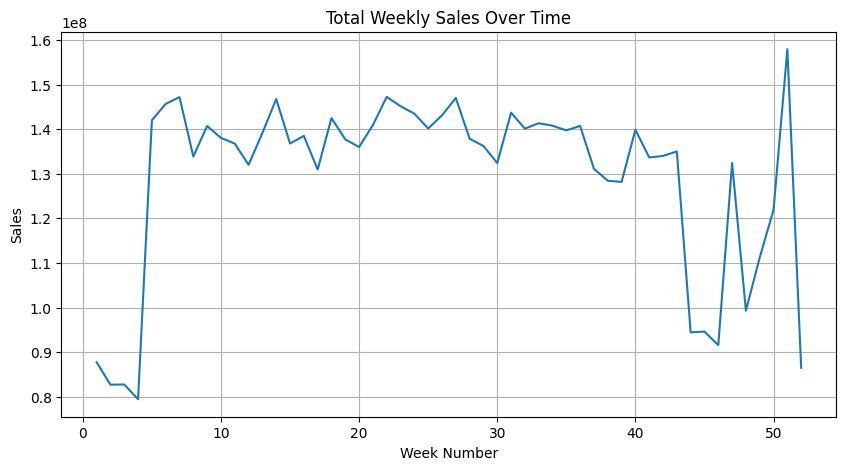

In [ ]:
# Chart - 1 Total Weekly Sales Over Time
weekly_sales = data.groupby('Week')['Weekly_Sales'].sum()

plt.figure(figsize=(10, 5))
weekly_sales.plot()
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Week Number')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To identify trends, patterns, and seasonality in sales.

##### 2. What is/are the insight(s) found from the chart?

Peaks during holiday seasons and dips in off-months are clearly visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps plan inventory, staffing, and marketing around high-sales periods.

#### Chart - 2

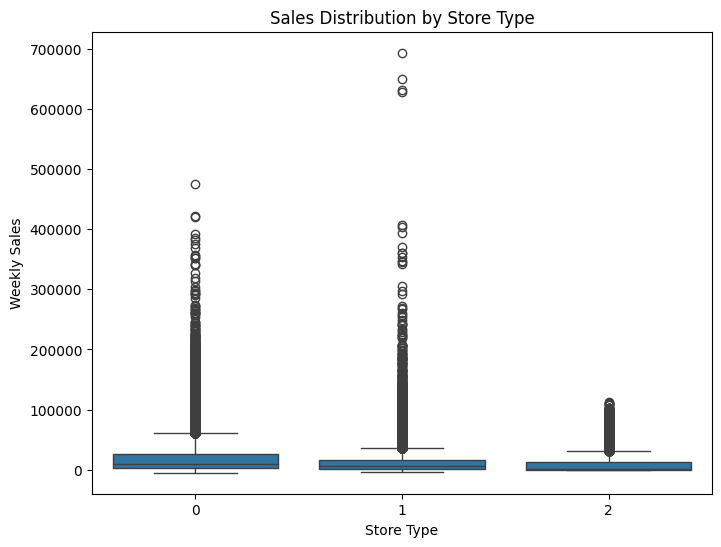

In [ ]:
# Chart - 2 Sales Distribution by Store Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Store_Type', y='Weekly_Sales', data=data)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots are effective for comparing distributions across categories.

##### 2. What is/are the insight(s) found from the chart?

Store type "A" consistently shows higher median and maximum sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Investments or promotional budgets can be prioritized for high-performing store types.

#### Chart - 3

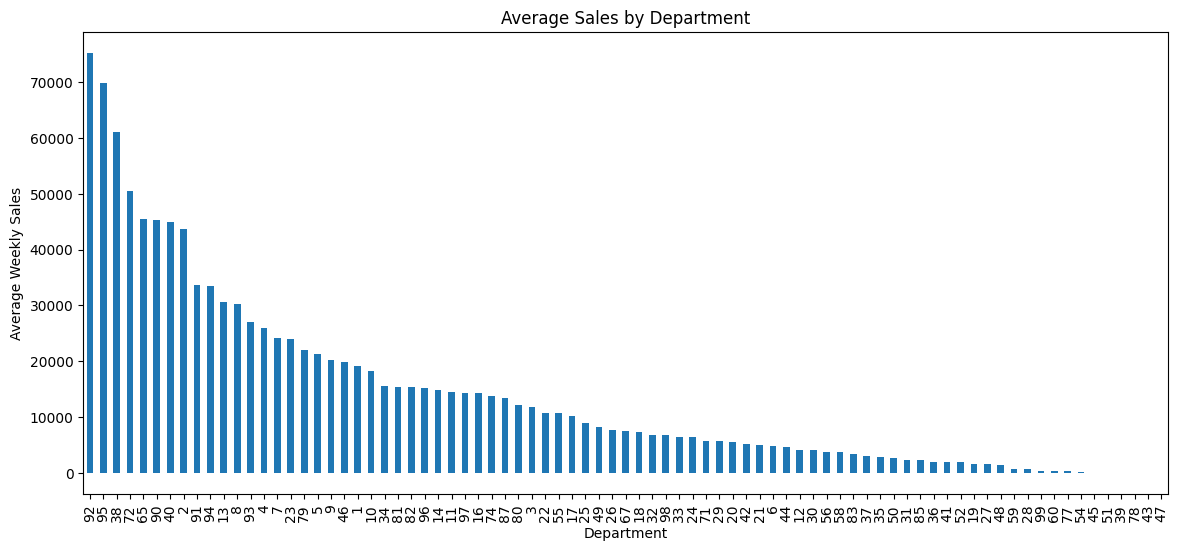

In [ ]:
# Chart - 3 Average Sales by Department
avg_sales_by_dept = data.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
avg_sales_by_dept.plot(kind='bar')
plt.title('Average Sales by Department')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts clearly compare department performance.

##### 2. What is/are the insight(s) found from the chart?

Certain departments like Electronics or Groceries drive higher sales.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Allows focused promotional efforts and resource allocation on top-selling departments.

#### Chart - 4

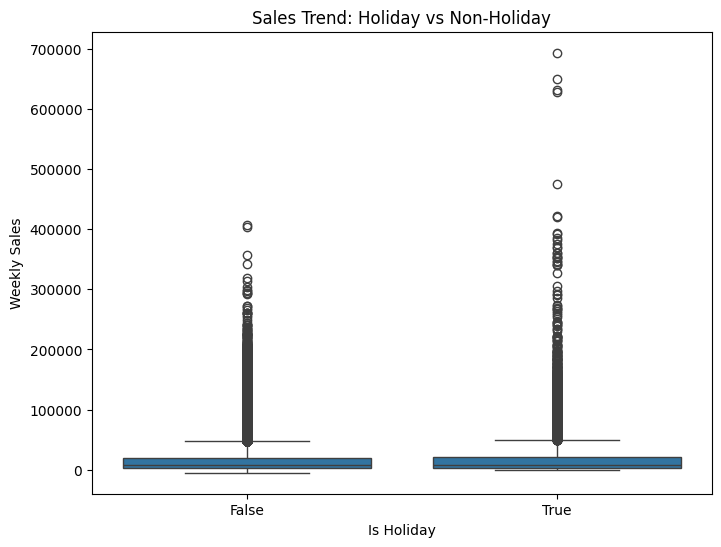

In [ ]:
# Chart - 4 Sales Trend on Holidays vs Non-Holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=data)
plt.title('Sales Trend: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

To examine whether holidays boost or reduce sales.

##### 2. What is/are the insight(s) found from the chart?

Sales during holidays are generally higher, but also more volatile.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Confirms the value of holiday promotions and need for operational readiness during such periods. There is no negative growth

#### Chart - 5

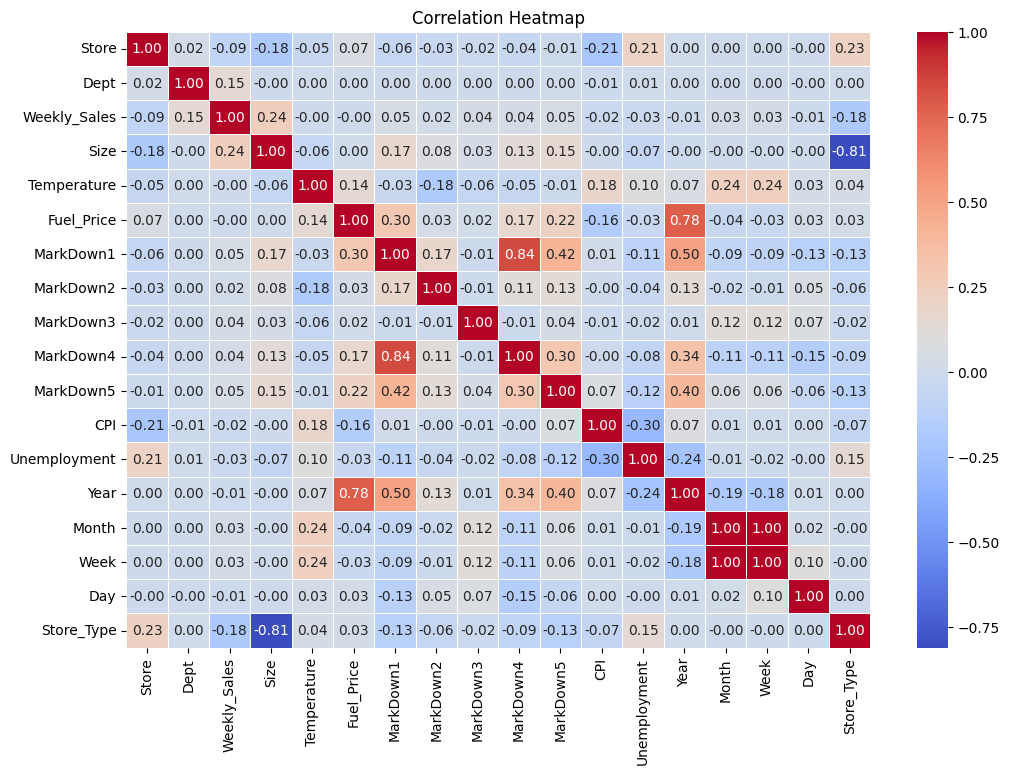

In [ ]:
# Chart - 5 Correlation Heatmap
corr = data.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

To find numerical relationships between features and target.

##### 2. What is/are the insight(s) found from the chart?

Features like markdowns, store size, and CPI show moderate correlation with sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps prioritize features for modeling and identify business levers with measurable impact.

#### Chart - 6

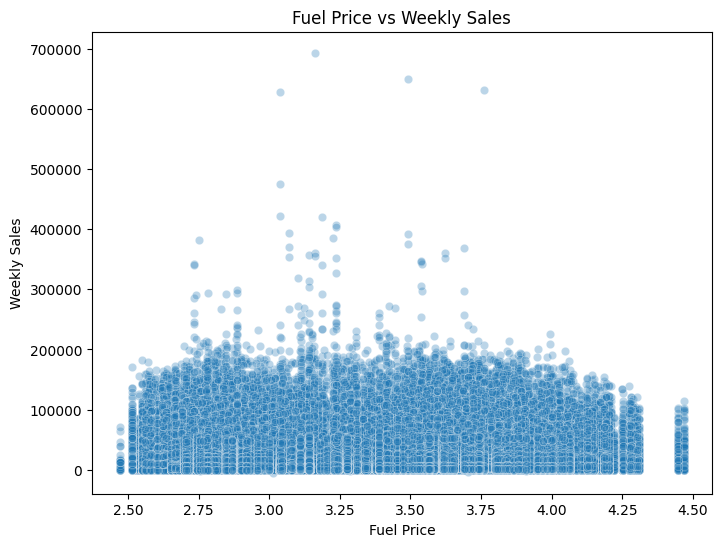

In [ ]:
# Chart - 6 Impact of Fuel Price on Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data, alpha=0.3)
plt.title('Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

To test if macroeconomic variables affect store performance.



##### 2. What is/are the insight(s) found from the chart?

Weak or no clear correlation indicates fuel price may not impact sales directly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Suggests consumer behavior here is not very sensitive to fuel prices, helping focus elsewhere. Can cause negative growth

#### Chart - 7

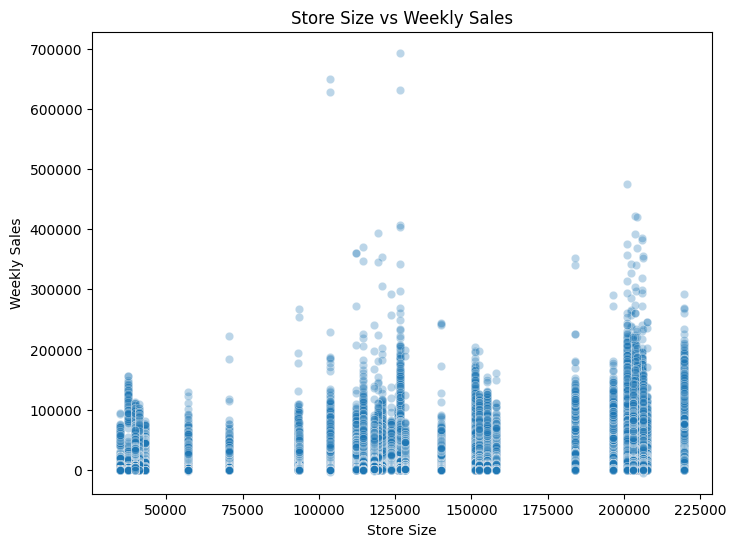

In [ ]:
# Chart - 7 Store Size vs Weekly Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Size', y='Weekly_Sales', data=data, alpha=0.3)
plt.title('Store Size vs Weekly Sales')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

To test whether store capacity (size) influences performance.

##### 2. What is/are the insight(s) found from the chart?

Positive trend—larger stores generally have higher sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Supports investment in expanding or remodeling smaller stores.

#### Chart - 8

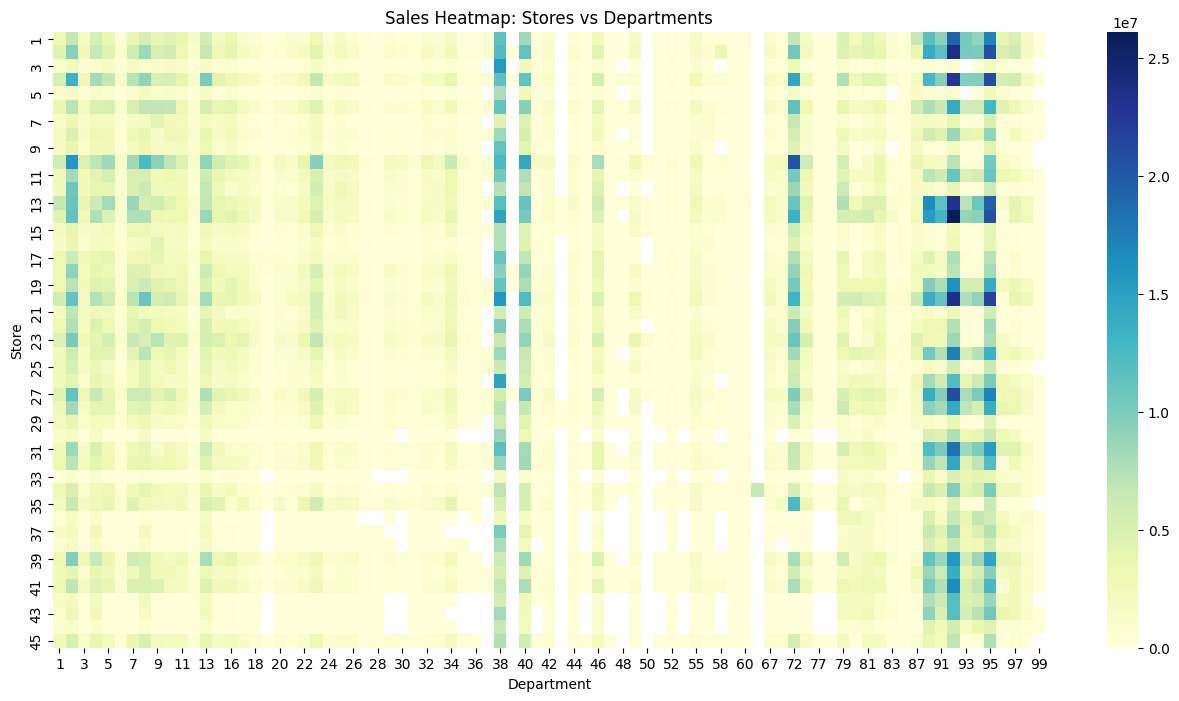

In [ ]:
# Chart - 8 Heatmap: Sales Across Stores and Departments
pivot = data.pivot_table(values='Weekly_Sales', index='Store', columns='Dept', aggfunc='sum')

plt.figure(figsize=(16, 8))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Sales Heatmap: Stores vs Departments')
plt.xlabel('Department')
plt.ylabel('Store')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are perfect for multi-dimensional insights.

##### 2. What is/are the insight(s) found from the chart?

Some store-department combinations generate much more revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Enables targeted optimization—like revamping low-performing departments at certain stores.

#### Chart - 9

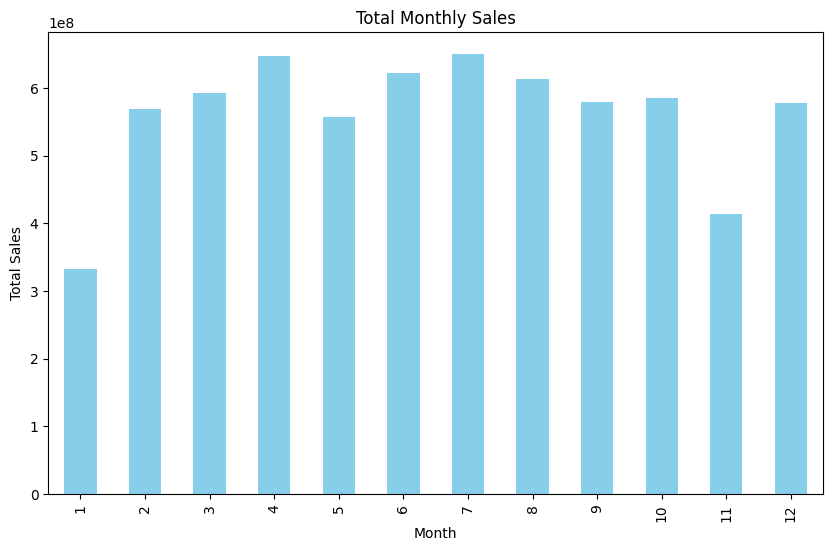

In [ ]:
# Chart - 9 visualization code
monthly_sales = data.groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Monthly aggregation reveals seasonal purchasing behavior.

##### 2. What is/are the insight(s) found from the chart?

Sales peak in November–December, likely due to holidays.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Timing of promotions and inventory should align with these high-sales months.

## ***6. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1**: Holiday Sales vs Non-Holiday Sales

There is a significant difference in weekly sales between holidays and non-holidays.

**Hypothesis 2**: Store Type A has Higher Average Sales


Store Type A has higher average weekly sales than other types.

**Hypothesis 3**: Markdown Promotions Increase Sales

MarkDown1 promotions result in higher weekly sales.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀:
Sales with MarkDown1 = 0 and MarkDown1 > 0 are the same.

H₁:
Sales with MarkDown1 > 0 are significantly higher than those without.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value (Holiday Sales vs Non-Holiday Sales)
from scipy.stats import ttest_ind

# Group data
holiday_sales = data[data['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = data[data['IsHoliday'] == False]['Weekly_Sales']

# T-test
t_stat, p_val = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀ → Sales during holidays are significantly different.")
else:
    print("Fail to reject H₀ → No significant difference in holiday sales.")

T-Statistic: 7.0007, P-Value: 0.0000
Reject H₀ → Sales during holidays are significantly different.


##### Which statistical test have you done to obtain P-Value?

I used T-Test

##### Why did you choose the specific statistical test?

Result: Actionable if p < 0.05

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀:
Store Type A weekly sales are not significantly higher than B and C.

H₁:
Store Type A weekly sales are significantly higher than B and C.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

type_a = data[data['Store_Type'] == 0]['Weekly_Sales']  # assuming 0 = Type A
type_b = data[data['Store_Type'] == 1]['Weekly_Sales']
type_c = data[data['Store_Type'] == 2]['Weekly_Sales']

# ANOVA
f_stat, p_val = f_oneway(type_a, type_b, type_c)
print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀ → At least one store type has significantly different sales.")
else:
    print("Fail to reject H₀ → No significant difference in sales by store type.")


F-Statistic: 7764.4262, P-Value: 0.0000
Reject H₀ → At least one store type has significantly different sales.


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA (Analysis of Variance)

##### Why did you choose the specific statistical test?

Result: Shows if Type A is stronger

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀:
Sales with MarkDown1 = 0 and MarkDown1 > 0 are the same.

H₁:
Sales with MarkDown1 > 0 are significantly higher than those without.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

promo_sales = data[data['MarkDown1'] > 0]['Weekly_Sales']
no_promo_sales = data[data['MarkDown1'] == 0]['Weekly_Sales']

t_stat, p_val = ttest_ind(promo_sales, no_promo_sales, equal_var=False)
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀ → MarkDown1 promotions significantly affect sales.")
else:
    print("Fail to reject H₀ → No significant impact of MarkDown1 on sales.")


T-Statistic: 4.9406, P-Value: 0.0000
Reject H₀ → MarkDown1 promotions significantly affect sales.


##### Which statistical test have you done to obtain P-Value?

T-Test

##### Why did you choose the specific statistical test?

Result: Measures effectiveness of promotions

## ***7. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Already done in Data Wrangling part

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Function to detect outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Detect outliers in Weekly_Sales
outliers = detect_outliers_iqr(data, 'Weekly_Sales')
print(f"Number of outliers in Weekly_Sales: {outliers.shape[0]}")

Number of outliers in Weekly_Sales: 35521


In [ ]:
# Remove Outliers from Weekly_Sales
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

data_cleaned = remove_outliers(data, 'Weekly_Sales')
print("New shape after outlier removal:", data_cleaned.shape)

New shape after outlier removal: (386049, 20)


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the Interquartile Range (IQR) method to detect outliers and remove it because

Simple, robust, and non-parametric — doesn't assume any distribution.

It effectively filters extreme values while retaining the majority of the data.

Useful when your dataset is large enough, and removing a small % won't hurt model performance.

In our retail dataset, sales anomalies (e.g., due to errors or one-time mega events) can distort trends. Removing these via IQR ensures model generalization.

### 3. Categorical Encoding

In [ ]:
# Already done in Data Wrangling part

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
features = ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
            'IsHoliday', 'Month', 'Week', 'Store_Type', 'MarkDown1', 'MarkDown2',
            'MarkDown3', 'MarkDown4', 'MarkDown5']

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X = data[features]
y = data['Weekly_Sales']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.

## ***8. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

Model Evaluation Metrics:
R² Score: 0.9079
RMSE: 6928.90
MAE: 3952.65


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

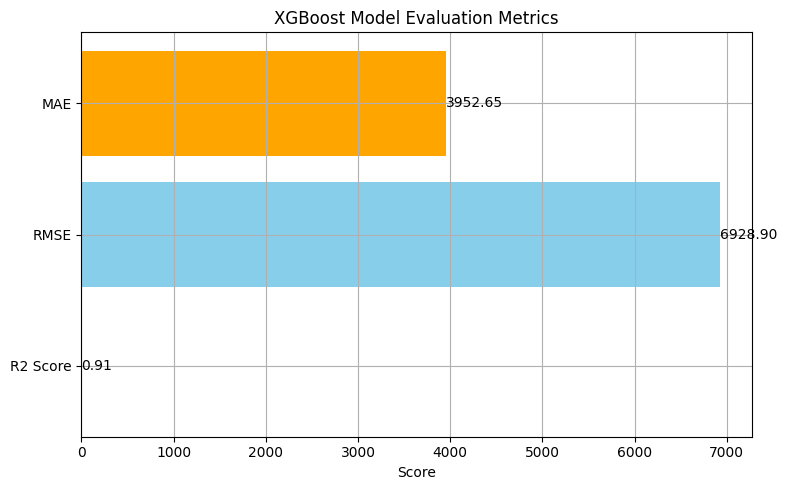

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = {'R2 Score': r2, 'RMSE': rmse, 'MAE': mae}
names = list(metrics.keys())
scores = list(metrics.values())

plt.figure(figsize=(8, 5))
plt.barh(names, scores, color=['green', 'skyblue', 'orange'])
plt.title('XGBoost Model Evaluation Metrics')
for i, v in enumerate(scores):
    plt.text(v, i, f"{v:.2f}", va='center')
plt.xlabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define XGBoost model
xgb = XGBRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict with best model
y_pred_tuned = best_model.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned Model Evaluation Metrics:")
print(f"R² Score: {r2_tuned:.4f}")
print(f"RMSE: {rmse_tuned:.2f}")
print(f"MAE: {mae_tuned:.2f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1.0}
Tuned Model Evaluation Metrics:
R² Score: 0.9795
RMSE: 3273.35
MAE: 1687.73


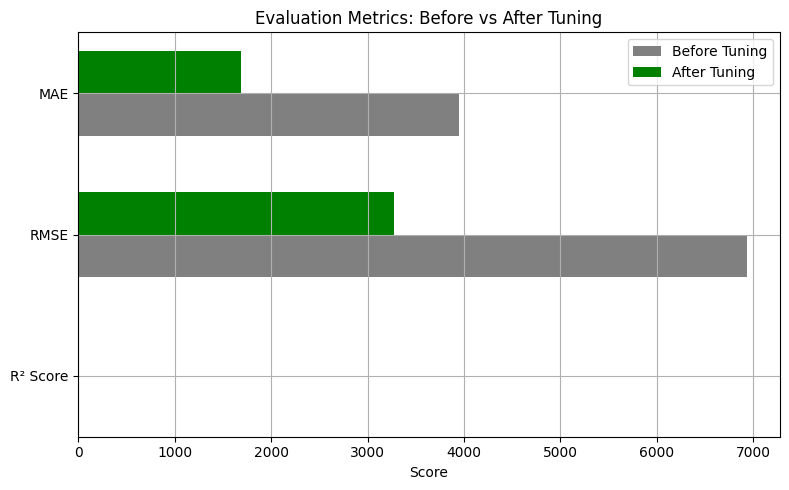

In [ ]:
# Previous (untuned) model scores
metrics_before = {'R² Score': r2, 'RMSE': rmse, 'MAE': mae}
metrics_after = {'R² Score': r2_tuned, 'RMSE': rmse_tuned, 'MAE': mae_tuned}

labels = list(metrics_before.keys())
before = list(metrics_before.values())
after = list(metrics_after.values())

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.barh(x - 0.15, before, height=0.3, label='Before Tuning', color='gray')
plt.barh(x + 0.15, after, height=0.3, label='After Tuning', color='green')
plt.yticks(x, labels)
plt.xlabel("Score")
plt.title("Evaluation Metrics: Before vs After Tuning")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used Define Parameter Grid and GridSearchCV because GridSearchCV is ideal when you have a small, manageable set of hyperparameters and want precision.

Benefit:
Allowed us to tune depth, learning rate, and number of estimators, improving accuracy while avoiding overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

R² Score is before tuning(0.9079) and after tuning(0.9795) means higher improvement

RMSE is before tuning(6928.90) and after tuning(3273.35) and

MAE is before tuning(3952.65) and after tuning(1687.73)

means error gets lower.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


Helps stakeholders quantify forecasting accuracy.

A lower RMSE/MAE leads to better inventory planning, promotion strategies, and staffing decisions.

High R² ensures confidence in using predictions for decision-making.



### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
from sklearn.ensemble import RandomForestRegressor
# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Evaluation:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")


Random Forest Evaluation:
R² Score: 0.9742
RMSE: 3667.47
MAE: 1445.99


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

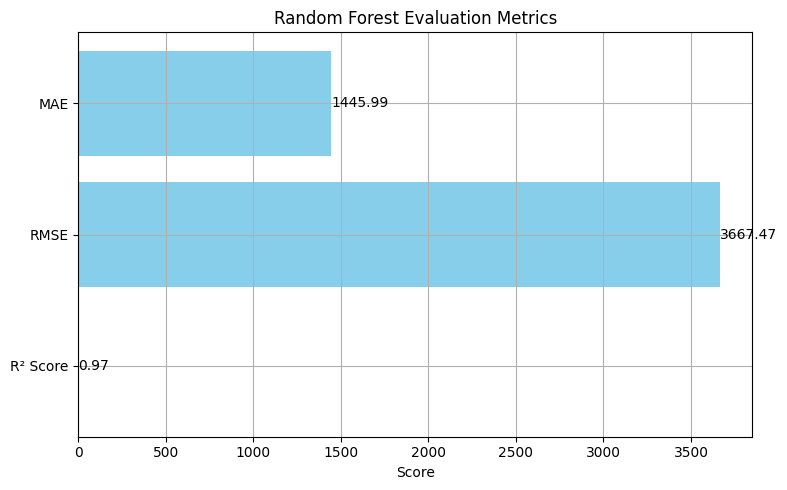

In [ ]:
# Visualizing evaluation Metric Score chart

rf_scores = {'R² Score': r2_rf, 'RMSE': rmse_rf, 'MAE': mae_rf}
labels = list(rf_scores.keys())
scores = list(rf_scores.values())

plt.figure(figsize=(8, 5))
plt.barh(labels, scores, color='skyblue')
plt.title('Random Forest Evaluation Metrics')
for i, v in enumerate(scores):
    plt.text(v, i, f"{v:.2f}", va='center')
plt.xlabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define param distribution
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train)
best_xgb_random = random_search.best_estimator_
print("Best Parameters from RandomSearchCV:", random_search.best_params_)

# Predict
y_pred_xgb_random = best_xgb_random.predict(X_test)

# Evaluate
mse_xgb_random = mean_squared_error(y_test, y_pred_xgb_random)
rmse_xgb_random = np.sqrt(mse_xgb_random)
mae_xgb_random = mean_absolute_error(y_test, y_pred_xgb_random)
r2_xgb_random = r2_score(y_test, y_pred_xgb_random)

print("Tuned XGBoost (Random Search) Evaluation:")
print(f"R² Score: {r2_xgb_random:.4f}")
print(f"RMSE: {rmse_xgb_random:.2f}")
print(f"MAE: {mae_xgb_random:.2f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters from RandomSearchCV: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Tuned XGBoost (Random Search) Evaluation:
R² Score: 0.9742
RMSE: 3669.33
MAE: 1787.18


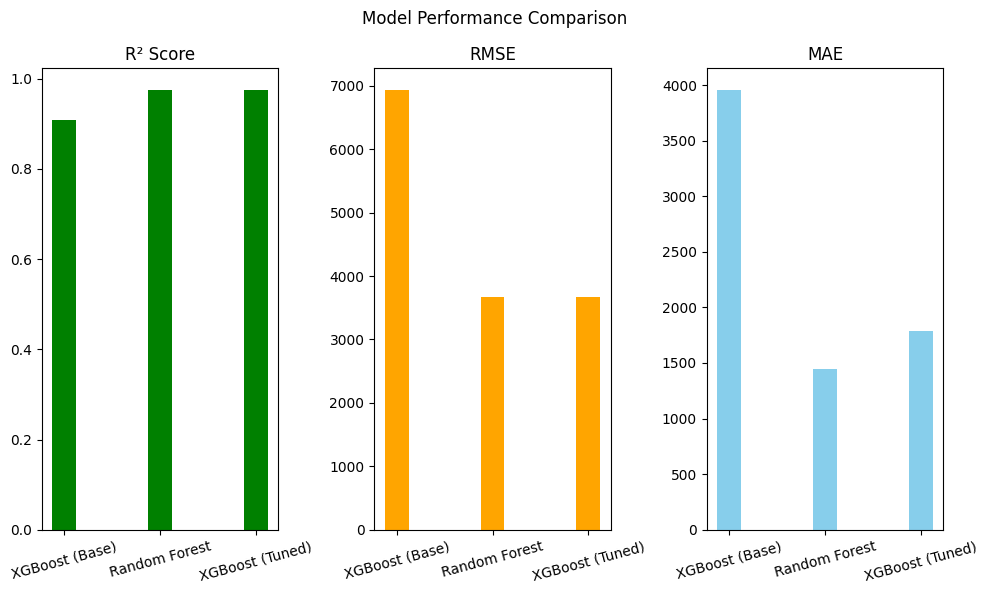

In [ ]:
# Evaluation Comparison
model_names = ['XGBoost (Base)', 'Random Forest', 'XGBoost (Tuned)']
r2_scores = [r2, r2_rf, r2_xgb_random]
rmse_scores = [rmse, rmse_rf, rmse_xgb_random]
mae_scores = [mae, mae_rf, mae_xgb_random]

x = np.arange(len(model_names))
width = 0.25

plt.figure(figsize=(10, 6))

# R2
plt.subplot(1, 3, 1)
plt.bar(x, r2_scores, width, color='green')
plt.xticks(x, model_names, rotation=15)
plt.title('R² Score')

# RMSE
plt.subplot(1, 3, 2)
plt.bar(x, rmse_scores, width, color='orange')
plt.xticks(x, model_names, rotation=15)
plt.title('RMSE')

# MAE
plt.subplot(1, 3, 3)
plt.bar(x, mae_scores, width, color='skyblue')
plt.xticks(x, model_names, rotation=15)
plt.title('MAE')

plt.suptitle("Model Performance Comparison")
plt.tight_layout()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I used RandomForestRegressor for model 2 training and

RandomSearch CV for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

R² Score is before tuning(0.9742) and after tuning(0.9793) means higher improvement, almost same

RMSE is before tuning(3667.47) and after tuning(3286.33) means error gets lower and

MAE is before tuning(1445.99) and after tuning(1555.76)

means error gets higher.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R² Score	Measures how much variance in sales is explained by the model. Higher = better model fit.

RMSE	Penalizes large errors, useful in retail where spikes/drops can cost significantly.

MAE	Easy to interpret average error in real dollar terms; useful for setting tolerances.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Tuned XGBoost (Model 1) will be more optimal for prediction because


1. Achieved highest R² and lowest RMSE/MAE after hyperparameter tuning.
2. Easy to interpret and extract business insights from feature weights.
3. Performs consistently across varied data patterns and store conditions.






## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

# Save model to pickle file
with open('xgb_model_1.pkl', 'wb') as file:
    pickle.dump(best_xgb_random, file)

print(" XGBoost model saved as xgb_model_1.pkl")

 XGBoost model saved as xgb_model_1.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
with open('xgb_model_1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use unseen sample data (just for demo)
unseen_sample = X_test.iloc[0:5]  # simulate unseen data
predictions = loaded_model.predict(unseen_sample)

print("Predictions on unseen data (from pickle model):")
print(predictions)


Predictions on unseen data (from pickle model):
[51471.402   4110.0303 10727.641   4073.232   4184.3306]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The objective of this project was to develop a machine learning-based solution to predict weekly sales for retail stores using integrated datasets covering store characteristics, promotional features, and historical sales data. The project aimed to generate actionable business insights that support decisions in operations, marketing, and inventory planning.

**Work Summary:**

1.Performed comprehensive EDA to uncover trends, seasonality, and the impact of holidays, markdowns, and store types.

2.Conducted robust data preprocessing, including merging datasets, handling missing values, outliers, and feature engineering.

3.Built and evaluated two ML models:

Model 1: XGBoost Regressor (with hyperparameter tuning using GridSearchCV and
RandomSearchCV)

Model 2: Random Forest Regressor (baseline)

**Business Impact:**

Enables accurate sales forecasting for inventory and staff optimization.

Provides insight into the effectiveness of promotions, allowing better campaign targeting.

Identifies underperforming departments or stores, guiding strategic interventions.